In [1]:
import pandas as pd
import numpy as np

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
csv = pd.read_csv("housing.csv", header=None, delimiter=r"\s+", names=column_names)

In [4]:
data = pd.DataFrame(csv)

In [5]:
data =(data-data.min())/(data.max()-data.min())

In [6]:
from sklearn.model_selection import train_test_split
x = data.iloc[:, :13].values
y = data.iloc[:, 13:].values 
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2)

In [10]:
#create neural network with 3 layers for xtrain and ytrain without using keras

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return x*(1-x)

#input dataset
x = xtrain
y = ytrain

#initialize weights randomly with mean 0

w0 = 2*np.random.random((13,13)) - 1
w1 = 2*np.random.random((13,1)) - 1

#training step

for i in range(10000):
    #forward propagation
    l0 = x
    l1 = sigmoid(np.dot(l0,w0))
    l2 = sigmoid(np.dot(l1,w1))
    
    #backpropagation
    l2_error = y - l2
    if(i%1000) == 0:
        print("Error:" + str(np.mean(np.abs(l2_error))))
    l2_delta = l2_error*sigmoid_derivative(l2)
    
    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * sigmoid_derivative(l1)
    
    w1 += l1.T.dot(l2_delta)
    w0 += l0.T.dot(l1_delta)

print("Output after training")
print(l2)

#test step

l0 = xtest
l1 = sigmoid(np.dot(l0,w0))
l2 = sigmoid(np.dot(l1,w1))

print("Output after testing")
print(l2)

#calculate error

l2_error = ytest - l2

print("Error:" + str(np.mean(np.abs(l2_error))))



Error:0.16945383227588362
Error:0.3899339933993399
Error:0.3899339933993399
Error:0.3899339933993399
Error:0.3899339933993399
Error:0.3899339933993399
Error:0.3899339933993399
Error:0.3899339933993399
Error:0.3899339933993399
Error:0.3899339933993399
Output after training
[[1.12691948e-16]
 [2.43635181e-16]
 [1.99076214e-17]
 [1.42613468e-16]
 [1.95912406e-17]
 [7.93532416e-18]
 [2.82522164e-17]
 [1.49046664e-17]
 [4.79411233e-18]
 [3.48242286e-17]
 [6.06550933e-17]
 [1.63283583e-16]
 [6.53397205e-17]
 [1.03788562e-16]
 [3.62406679e-17]
 [1.12658181e-17]
 [2.14135059e-17]
 [3.17498200e-17]
 [7.79870024e-18]
 [3.51654572e-17]
 [1.59664327e-17]
 [2.08524987e-16]
 [1.37217212e-17]
 [6.73674690e-18]
 [7.23133576e-17]
 [4.83708466e-18]
 [3.15144723e-17]
 [2.07751148e-17]
 [9.84413561e-18]
 [1.63369466e-17]
 [6.47859081e-17]
 [5.03701436e-18]
 [1.26181843e-17]
 [1.59328349e-17]
 [1.00093461e-18]
 [9.22847907e-19]
 [2.61050600e-17]
 [1.76376974e-17]
 [9.43617933e-19]
 [2.97991804e-17]
 [3.737

Error:0.4518418754786837
Error:0.38993399339933993
Error:0.38993399339933993
Error:0.38993399339933993
Error:0.38993399339933993
Error:0.38993399339933993
Error:0.38993399339933993
Error:0.38993399339933993
Error:0.38993399339933993
Error:0.38993399339933993
Error:0.38993399339933993
Error:0.38993399339933993
Error:0.38993399339933993
Error:0.38993399339933993
Error:0.38993399339933993
Error:0.38993399339933993
Error:0.38993399339933993
Error:0.38993399339933993
Error:0.38993399339933993
Error:0.38993399339933993
Error:0.38993399339933993
Output after training
[[5.00242293e-23]
 [6.37058072e-22]
 [7.17283526e-20]
 [3.57174136e-21]
 [2.02781589e-20]
 [1.44743943e-23]
 [1.75250647e-21]
 [1.03448772e-21]
 [3.58265034e-22]
 [4.45886660e-21]
 [3.13325769e-22]
 [6.92988663e-21]
 [1.52315685e-20]
 [2.46602456e-22]
 [1.59897087e-21]
 [1.81094681e-20]
 [1.03738651e-20]
 [2.20544291e-22]
 [1.76672211e-23]
 [1.20626484e-20]
 [8.59343775e-21]
 [8.49390987e-22]
 [2.81844650e-22]
 [5.55106112e-23]
 

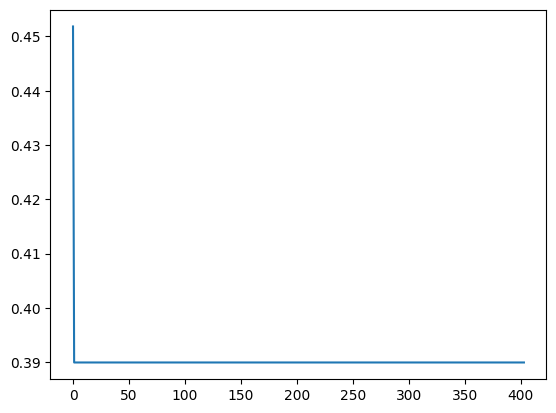

In [18]:
#create forward propagation and backpropagation functions for neural network with 3 layers for xtrain and ytrain without using keras and plot the error

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def sigmoid(x):
    return 1/(1+np.exp(-x)) 

def sigmoid_derivative(x):
    return x*(1-x)

#input dataset
x = xtrain
y = ytrain

#initialize weights randomly with mean 0

w0 = 2*np.random.random((13,13)) - 1
w1 = 2*np.random.random((13,1)) - 1

#training step

error = []
for i in range(x.shape[0]):
    #forward propagation
    l0 = x
    l1 = sigmoid(np.dot(l0,w0))
    l2 = sigmoid(np.dot(l1,w1))
    
    #backpropagation
    l2_error = y - l2
    error.append(np.mean(np.abs(l2_error)))
    if(i%20) == 0:
        print("Error:" + str(np.mean(np.abs(l2_error))))
    l2_delta = l2_error*sigmoid_derivative(l2)
    
    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * sigmoid_derivative(l1)
    
    w1 += l1.T.dot(l2_delta)
    w0 += l0.T.dot(l1_delta)

print("Output after training")
print(l2)

#test step

l0 = xtest
l1 = sigmoid(np.dot(l0,w0))

l2 = sigmoid(np.dot(l1,w1))

print("Output after testing")

print(l2)

#calculate error

l2_error = ytest - l2

print("Error:" + str(np.mean(np.abs(l2_error))))

plt.plot(error)

plt.show()